# Ab Initio Thermodynamics (Pt$_2$O$_x$)



$
E_{form} (Pt_xO_y) = \dfrac{1}{y} \bigg (E(Pt_xO_y)-E(Pt_x)-\dfrac{1}{2}yE(O_2) \bigg )
$

$
\Delta G(T,p) \approx y \ E_{form}(Pt_xO_y) - y \ \Delta \mu_O(T,p)
$

$
\Delta \mu_O (T,p) = \mu_O(T,p) - \dfrac{1}{2}E(O_2)
$

$
\mu_O(T,p) = \mu_O(T,p^0) + \dfrac{1}{2}  R T \ log(p/p^0)
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Experimental data

data = np.array(np.loadtxt("O2_JANAF_0-1000.txt",dtype=np.float64, skiprows=2))
T = data[:,0]
S = data[:,2]*1.0364E-5
dH = data[:,4]
dH_zero = (dH-dH[0])*0.01036427230133138
G = (dH_zero - T*S)/2

In [3]:
# interpolate the experimental values
G1 = np.linspace(G[0],G[1],100, endpoint=False)
G2 = np.linspace(G[1],G[2],100, endpoint=False)
G3 = np.linspace(G[2],G[3],50, endpoint=False)
G4 = np.linspace(G[3],G[5],50, endpoint=False)
G5 = np.linspace(G[5],G[6],50, endpoint=False)
G6 = np.linspace(G[6],G[7],50, endpoint=False)
G7 = np.linspace(G[7],G[8],50, endpoint=False)
G8 = np.linspace(G[8],G[9],50, endpoint=False)
G9 = np.linspace(G[9],G[10],100, endpoint=False)
G10 = np.linspace(G[10],G[11],100, endpoint=False)
G11 = np.linspace(G[11],G[12],100, endpoint=False)
G12 = np.linspace(G[12],G[13],100, endpoint=False)
G13 = np.linspace(G[13],G[14],101)

G = np.concatenate((G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13))
# Temperatures
T = np.linspace(0,1000,1001)

# pressure values
p = np.logspace(-12, 0, num=1001)

In [4]:
def omega(mu_O,Efor,n):
    omega = Efor - n*mu_O 
    return omega

def mu_O(p,T,G):
    k = 8.61733262e-05  # in eV
    p0 = 1   # bar
    p_part = 0.5*k*T*np.log(p/p0)
    mu_O = G + p_part
    return mu_O


In [5]:
EO2 = -9.86450898

# Formation energy
Pt2 = 0.00000
Pt2O1 = -1.51603866
Pt2O2 = -3.71682776
Pt2O3 = -5.1107872
Pt2O4 = -5.70881781

In [6]:
# Pt2O1

pT = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        ji = [p[j],T[i]]
        pT.append(ji)

potential_oxygen1 = []
omega_Pt2O1 = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        potential_ith = mu_O(p[j],T[i],G[i])
        omega_ith = omega(potential_ith,Pt2O1,1)
        potential_oxygen1.append(potential_ith)
        omega_Pt2O1.append(omega_ith)

        
# Pt2O2
potential_oxygen2 = []
pT2 = []
omega_Pt2O2 = []
for i in range(len(T)):
    for j in range(len(p)):
        potential_ith = mu_O(p[j],T[i],G[i])
        omega_ith = omega(potential_ith,Pt2O2,2)
        potential_oxygen2.append(potential_ith)
        omega_Pt2O2.append(omega_ith)
        
# Pt2O3
potential_oxygen3 = []
omega_Pt2O3 = []
for i in range(len(T)): 
    for j in range(len(p)):
        potential_ith = mu_O(p[j],T[i],G[i])
        omega_ith = omega(potential_ith,Pt2O3,3)
        potential_oxygen3.append(potential_ith)
        omega_Pt2O3.append(omega_ith)
        
# Pt2O4
potential_oxygen4 = []
omega_Pt2O4 = []
for i in range(len(T)):
    for j in range(len(p)):
        potential_ith = mu_O(p[j],T[i],G[i])
        ij = [T[i],p[j]]
        omega_ith = omega(potential_ith,Pt2O4,4)
        potential_oxygen4.append(potential_ith)
        omega_Pt2O4.append(omega_ith)
        
# Pt2
omega_Pt2 = np.zeros(len(omega_Pt2O4))

In [7]:
# Comparison 

min_Pt2 = []
min_Pt2O1 = []
min_Pt2O2 = []
min_Pt2O3 = []
min_Pt2O4 = []

for k in range(len(omega_Pt2)):
    omega_cluster = [omega_Pt2[k],omega_Pt2O1[k],omega_Pt2O2[k],omega_Pt2O3[k],omega_Pt2O4[k]]
    min_cluster = omega_cluster.index(min(omega_cluster))
    if min_cluster == 0:
        min_Pt2.append(pT[k])
    elif min_cluster == 1:
        min_Pt2O1.append(pT[k])
    elif min_cluster == 2:
        min_Pt2O2.append(pT[k])
    elif min_cluster == 3:
        min_Pt2O3.append(pT[k])
    elif min_cluster == 4:
        min_Pt2O4.append(pT[k])

In [8]:
p_Pt2 = [row[0] for row in min_Pt2]
T_Pt2 = [row[1] for row in min_Pt2]

p_Pt2O1 = [row[0] for row in min_Pt2O1]
T_Pt2O1 = [row[1] for row in min_Pt2O1]

p_Pt2O2 = [row[0] for row in min_Pt2O2]
T_Pt2O2 = [row[1] for row in min_Pt2O2]

p_Pt2O3 = [row[0] for row in min_Pt2O3]
T_Pt2O3 = [row[1] for row in min_Pt2O3]

p_Pt2O4 = [row[0] for row in min_Pt2O4]
T_Pt2O4 = [row[1] for row in min_Pt2O4]

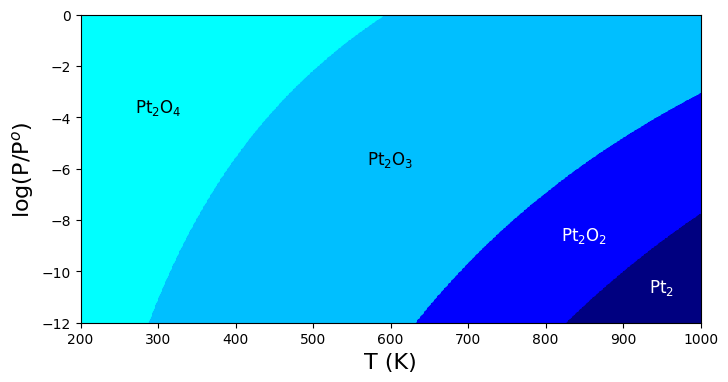

In [9]:
fig = plt.figure(figsize=(8,4))

plt.plot(T_Pt2,np.log10(p_Pt2),'.', color='navy', label='Pt$_2$',markersize=2)
plt.plot(T_Pt2O1,np.log10(p_Pt2O1),'.', color='crimson', label='Pt$_2$O$_1$',markersize=2)
plt.plot(T_Pt2O2,np.log10(p_Pt2O2),'.', color='blue', label='Pt$_2$O$_2$',markersize=2)
plt.plot(T_Pt2O3,np.log10(p_Pt2O3),'.', color='deepskyblue', label='Pt$_2$O$_3$',markersize=2)
plt.plot(T_Pt2O4,np.log10(p_Pt2O4),'.', color='cyan', label='Pt$_2$O$_4$',markersize=2)

plt.xlim((200,1000))
plt.ylim((-12,0))
plt.xlabel('T (K)', weight = 'normal', size = 16)
plt.ylabel('log(P/P$^o$)', weight = 'normal', size = 16)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1.01),prop={'size': 14})

plt.annotate('Pt$_2$O$_4$',xy=(400,-2), xytext=(300,-4),horizontalalignment='center', verticalalignment='bottom',size=12)
plt.annotate('Pt$_2$O$_3$',xy=(400,-2), xytext=(600,-6),horizontalalignment='center', verticalalignment='bottom',size=12)
plt.annotate('Pt$_2$O$_2$',xy=(400,-2), xytext=(850,-9),horizontalalignment='center', verticalalignment='bottom',size=12,color='white')
plt.annotate('Pt$_2$',xy=(400,-2), xytext=(950,-11),horizontalalignment='center', verticalalignment='bottom',size=12,color='white')


plt.savefig('PT_Pt2Ox.jpg',dpi=1200,bbox_inches='tight' )
plt.show()